# **CodSoft Machine Learning Internship**

## **Task 1: Movie Genre Classification**

## **Data Collection**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("train_data.txt", sep = ":::", engine = "python", header = None)
test = pd.read_csv("test_data.txt", sep = ":::", engine = "python", header = None)
train.head()

,0,1,2,3
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [3]:
test.head()

,0,1,2
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [4]:
train.columns = ["ID","Title","Genre","Description"]
test.columns = ["ID","Title","Description"]

In [5]:
train.head()

,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [6]:
train.describe()

,ID
count,54214.000000
mean,27107.500000
std,15650.378084
min,1.000000
25%,13554.250000
50%,27107.500000
75%,40660.750000
max,54214.000000


In [7]:
test.describe()

,ID
count,54200.000000
mean,27100.500000
std,15646.336632
min,1.000000
25%,13550.750000
50%,27100.500000
75%,40650.250000
max,54200.000000


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   Title        54214 non-null  object
 2   Genre        54214 non-null  object
 3   Description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  int64 
 1   Title        54200 non-null  object
 2   Description  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


## **Data Cleaning**

In [10]:
train.isnull().sum()

ID             0
Title          0
Genre          0
Description    0
dtype: int64

In [11]:
test.isnull().sum()

ID             0
Title          0
Description    0
dtype: int64

In [12]:
train.duplicated().sum()

0

In [13]:
test.duplicated().sum()

0

In [14]:
train['Description'].fillna("", inplace=True)
test['Description'].fillna("", inplace=True)

In [15]:
import re
def data_cleaning(txt):
    txt = re.sub(r"[^a-zA-Z+']", ' ', txt)
    txt = re.sub("\s[\s]+", " ", txt).strip()
    txt = re.sub(r'@\S+', ' ', txt)
    txt = re.sub(r'http\S+', ' ', txt)
    return

In [16]:
train["dc"] = train["Description"].apply(data_cleaning)
test["dc"] = test["Description"].apply(data_cleaning)

In [17]:
train["Genre"].value_counts()

 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: Genre, dtype: int64

## **Data Visualization**

Text(0.5, 1.0, 'Distribution of Genres')

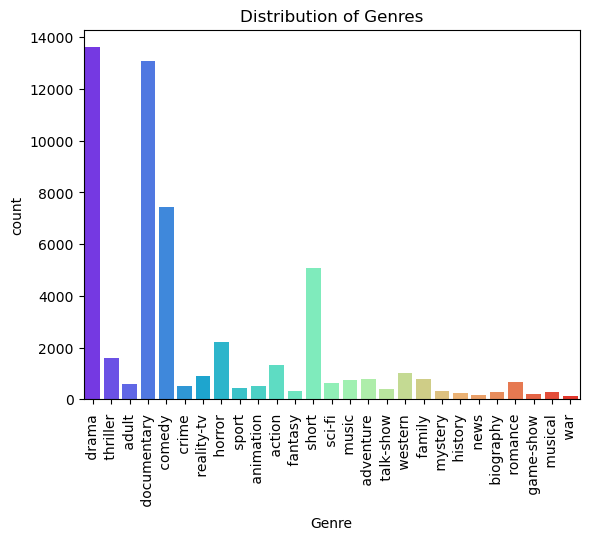

In [18]:
sns.countplot(x = "Genre",data = train,palette = "rainbow")
plt.xticks(rotation=90)
plt.title("Distribution of Genres")

Text(0.5, 1.0, 'Most Genres of the movies(From most to least)')

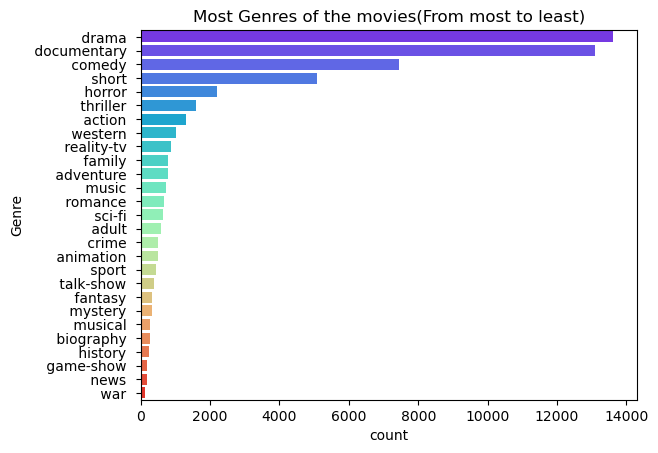

In [19]:
sns.countplot(y = "Genre",data = train,order=train.Genre.value_counts().index,palette = "rainbow")
plt.title("Most Genres of the movies(From most to least)")

Text(0.5, 1.0, 'Most Genres in the dataset')

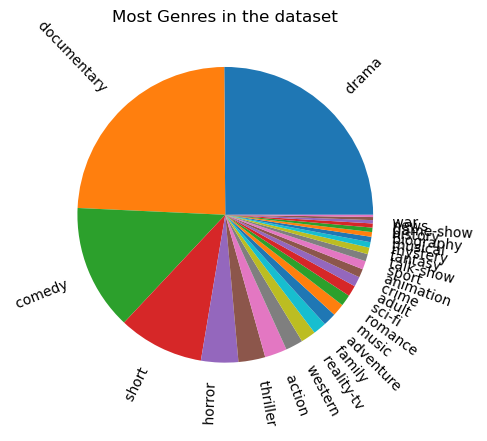

In [20]:
ax = train["Genre"].value_counts()
plt.pie(ax,labels = ax.index, rotatelabels=True)
plt.title("Most Genres in the dataset")

## **Model Selection and Training**

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

In [22]:
tdidf = TfidfVectorizer()
x_train = tdidf.fit_transform(train["Description"])
x_test = tdidf.transform(test["Description"])

In [23]:
y_train = train["Genre"]
x_train.shape[0],y_train.shape[0]

(54214, 54214)

## **Implementation of Logistic Regression and measuring its accuracy**

In [24]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

F:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
print(x_test)

  (0, 118438)	0.07259539181264887
  (0, 117991)	0.13407060770203216
  (0, 117357)	0.05458259461492238
  (0, 117326)	0.0405175394958764
  (0, 114644)	0.6925722225752599
  (0, 110331)	0.08136133098894775
  (0, 109518)	0.11558727217534276
  (0, 109246)	0.11483462399865137
  (0, 108668)	0.058747616857006336
  (0, 107539)	0.017510862811941398
  (0, 107516)	0.03085500095809899
  (0, 107478)	0.061235300753781884
  (0, 103145)	0.08244522647223447
  (0, 103047)	0.08277041781816576
  (0, 102923)	0.09751204227546173
  (0, 100427)	0.057323572194009936
  (0, 97890)	0.16523559377786176
  (0, 96899)	0.167482160249658
  (0, 92493)	0.17005184295700873
  (0, 90197)	0.07745251808417909
  (0, 86454)	0.10705911776627591
  (0, 77996)	0.09003268914390124
  (0, 77058)	0.08145130192690676
  (0, 76597)	0.057458981736960374
  (0, 76435)	0.1202450295493145
  :	:
  (54199, 48796)	0.1434213492160776
  (54199, 47188)	0.04989469486654254
  (54199, 44535)	0.07766980510240934
  (54199, 40180)	0.13316131799866227
  (541

In [26]:
reg = lr.predict(x_test)
reg

array([' drama ', ' drama ', ' documentary ', ..., ' comedy ', ' drama ',
       ' documentary '], dtype=object)

In [27]:
df = pd.read_csv("test_data_solution.txt",sep = ":::",engine = "python",header = None)

In [28]:
df.columns = ["ID","Title","Genre","Description"]
df.head()

,ID,Title,Genre,Description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [29]:
y_test = df["Genre"]

In [30]:
acc = accuracy_score(y_test,reg)
print("Logistic Regression Accuracy = ",acc*100,"%")

Logistic Regression Accuracy =  59.44649446494466 %


## **Implementation of Support Vector Machine(SVM) and measuring its accuracy**

In [32]:
svm = SVC(max_iter = 500)
svm.fit(x_train,y_train)

F:\Anaconda\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(max_iter=500)

In [33]:
reg2 = svm.predict(x_test)
reg2

array([' comedy ', ' drama ', ' documentary ', ..., ' comedy ',
       ' comedy ', ' short '], dtype=object)

In [39]:
acc2 = accuracy_score(y_test,reg2)
print("SVM Classifier Accuracy = ",acc2*100,"%")

SVM Classifier Accuracy =  49.555350553505534 %


## **Implementation of Naive Bayes Classifier and Measuring its accuracy**

In [41]:
nb = MultinomialNB()
nb.fit(x_train,y_train)

MultinomialNB()

In [42]:
reg3 = nb.predict(x_test)
reg3

array([' drama ', ' drama ', ' documentary ', ..., ' drama ', ' drama ',
       ' documentary '], dtype='<U13')

In [45]:
acc3 = accuracy_score(y_test,reg3)
print("Naive Bayes Classifier Accuracy = ",acc3*100,"%")

Naive Bayes Classifier Accuracy =  44.26752767527675 %
